# BISWAJIT KOLEY : 193110002

Developed a clustering model of the credit card users of a company to established a better marketing strategy.
K-means,PCA and Hierarchical model is used to developed the cluster.

Data: https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis/data

The dataset summarizes the usage behavior of about 9000 active credit card holders during 6 months. The file is at a customer level with 18 behavioral variables.

In [1]:
# data management
import pandas as pd
import numpy as np

# visualization
from pylab import*
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# preprocessing
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

# clusters models
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("C:/Users/Biswajit/creditcard/CC GENERAL.csv")

In [3]:
data.shape

(8950, 18)

In [4]:
data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [5]:
features = data.columns[1:]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data[features].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
print(data[data.CREDIT_LIMIT.isna()].shape[0],' clientes')
print("{0:.2f}%".format(100*data[data.CREDIT_LIMIT.isna()].shape[0]/data.shape[0]))

1  clientes
0.01%


In [11]:
data[data.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
data.CREDIT_LIMIT.describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [13]:
print('Customers with zero credit limit:' , data[data.CREDIT_LIMIT==0].shape[0])

Customers with zero credit limit: 0


In [14]:
data_aux = data[(data.PURCHASES_TRX==0)&(data.CASH_ADVANCE_TRX>0)][['CASH_ADVANCE','CASH_ADVANCE_TRX','CREDIT_LIMIT']]
print(data_aux.describe())
data_aux.head()

       CASH_ADVANCE  CASH_ADVANCE_TRX  CREDIT_LIMIT
count   2040.000000       2040.000000   2039.000000
mean    1992.261348          6.302941   4033.137159
std     2471.855175          8.086244   3267.328465
min       18.042768          1.000000     50.000000
25%      380.582133          2.000000   1500.000000
50%     1206.719268          4.000000   3000.000000
75%     2706.003459          8.000000   6000.000000
max    26194.049540        123.000000  19000.000000


,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT
1,6442.945483,4,7000.0
14,346.811390,1,3000.0
16,2784.274703,3,3000.0
24,798.949863,4,6000.0
35,99.264367,1,1800.0


In [15]:
print(data[data.MINIMUM_PAYMENTS.isna()].shape[0],' clientes')
print("{0:.2f}%".format(100*data[data.MINIMUM_PAYMENTS.isna()].shape[0]/data.shape[0]))

313  clientes
3.50%


In [16]:
data[data.MINIMUM_PAYMENTS.isna()].head(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,C10065,7.152356,0.090909,840.00,840.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12


In [17]:
data[(data.PAYMENTS==0)].shape[0] == data[(data.PAYMENTS==0)&(data.MINIMUM_PAYMENTS.isna())].shape[0]

True

In [18]:
data[(data.MINIMUM_PAYMENTS.isna())&(data.PRC_FULL_PAYMENT==0)].shape[0] == data[data.MINIMUM_PAYMENTS.isna()].shape[0]

True

In [19]:
data.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [20]:
def detect_col_outliers(ls_data):
     # z_score and filter

    mean = np.mean(ls_data)
    std = np.std(ls_data)
   
    return [i for i in ls_data if np.abs(i-mean) > 4*std]

In [21]:
features_outliers = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
for name_col in features_outliers:
    rtdo = detect_col_outliers(data[name_col])
    print('-'*50)
    print(name_col)
    print('# values outlier: ', len(rtdo))
    print('{0:.2f}% of the total data'.format(100*len(rtdo)/data.shape[0]))

--------------------------------------------------
BALANCE
# values outlier:  70
0.78% of the total data
--------------------------------------------------
PURCHASES
# values outlier:  80
0.89% of the total data
--------------------------------------------------
ONEOFF_PURCHASES
# values outlier:  74
0.83% of the total data
--------------------------------------------------
INSTALLMENTS_PURCHASES
# values outlier:  79
0.88% of the total data
--------------------------------------------------
CASH_ADVANCE
# values outlier:  98
1.09% of the total data
--------------------------------------------------
CASH_ADVANCE_TRX
# values outlier:  80
0.89% of the total data
--------------------------------------------------
PURCHASES_TRX
# values outlier:  95
1.06% of the total data
--------------------------------------------------
CREDIT_LIMIT
# values outlier:  29
0.32% of the total data
--------------------------------------------------
PAYMENTS
# values outlier:  92
1.03% of the total data
---

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

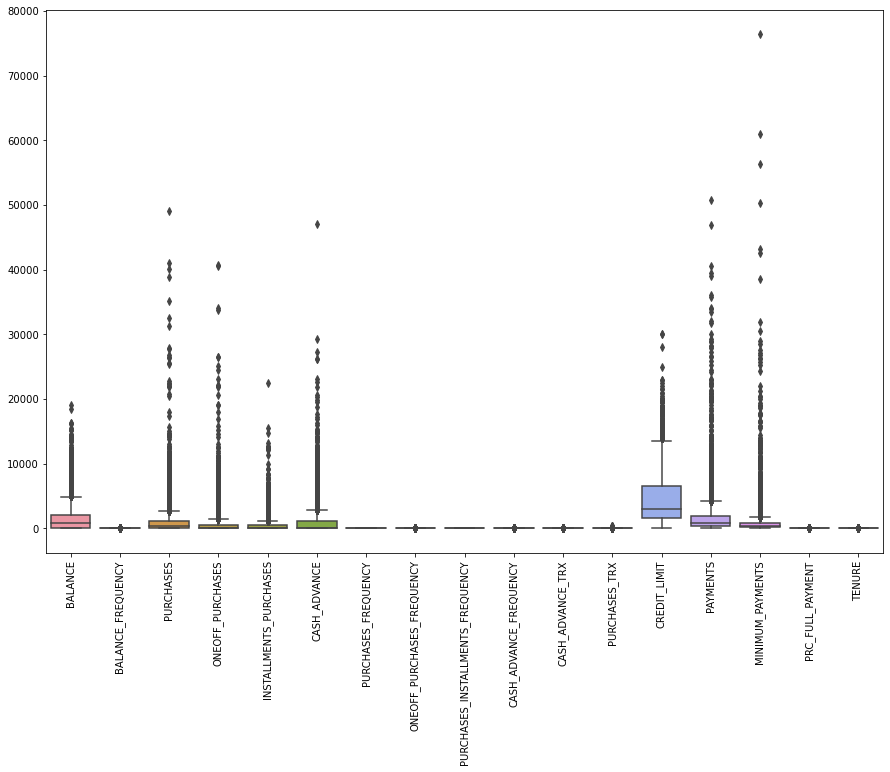

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data[features])
plt.xticks(rotation=90)

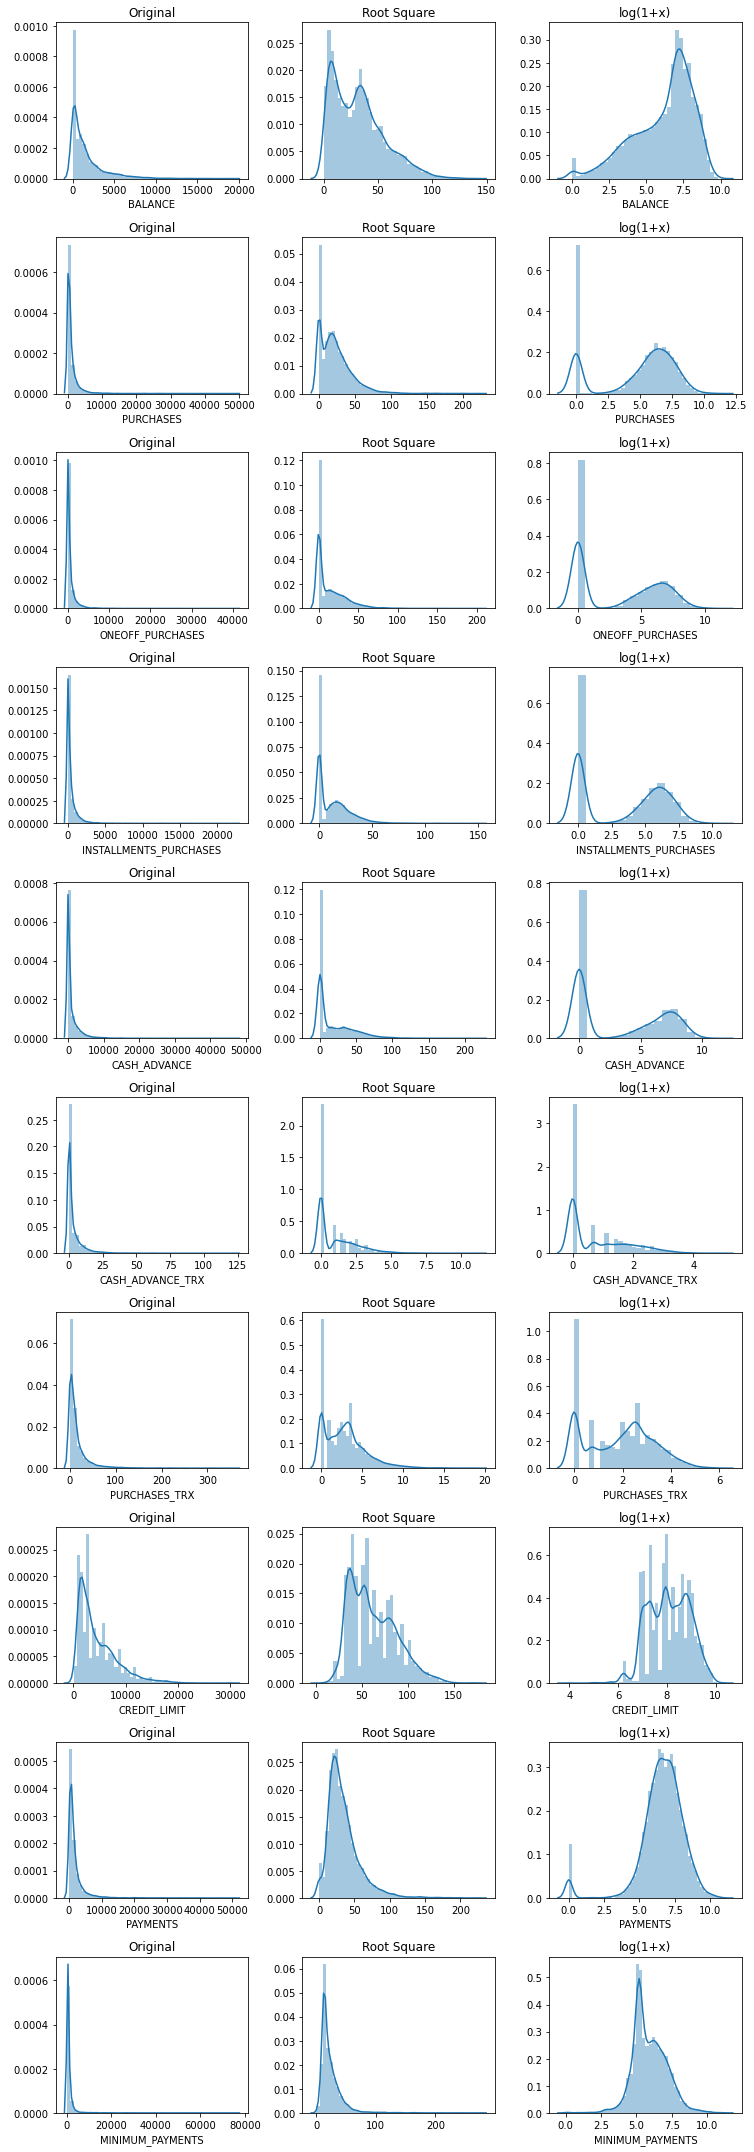

In [23]:
nr_rows = len(features_outliers)
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r, col in enumerate(features_outliers):
    sns.distplot(data[col], ax = axs[r][0]).set_title('Original')
    sns.distplot(np.sqrt(data[col].tolist()), ax = axs[r][1]).set_title("Root Square")
    sns.distplot(np.log1p(data[col]), ax = axs[r][2]).set_title('log(1+x)')
plt.tight_layout()    
plt.show()

In [24]:
HKL=["CASH_ADVANCE_TRX","PUCHASE_TRX","TENURE"]
int_cols = data[features].columns
int_cols


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
for col in int_cols:
    print(data[col].value_counts().sort_values(ascending=False))
    print('-'*30)

0.000000       80
4229.914629     1
1923.696463     1
4.160112        1
5091.643375     1
               ..
185.924664      1
14.593148       1
5636.389815     1
251.715214      1
438.416100      1
Name: BALANCE, Length: 8871, dtype: int64
------------------------------
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.777778      22
0.333333      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.285714       8
0.100000       8
0.250000       8
0.444444       7
0.166667       7
0.142857       7
0.600000       6
0.111111       5
0.222222       5
0.428571       

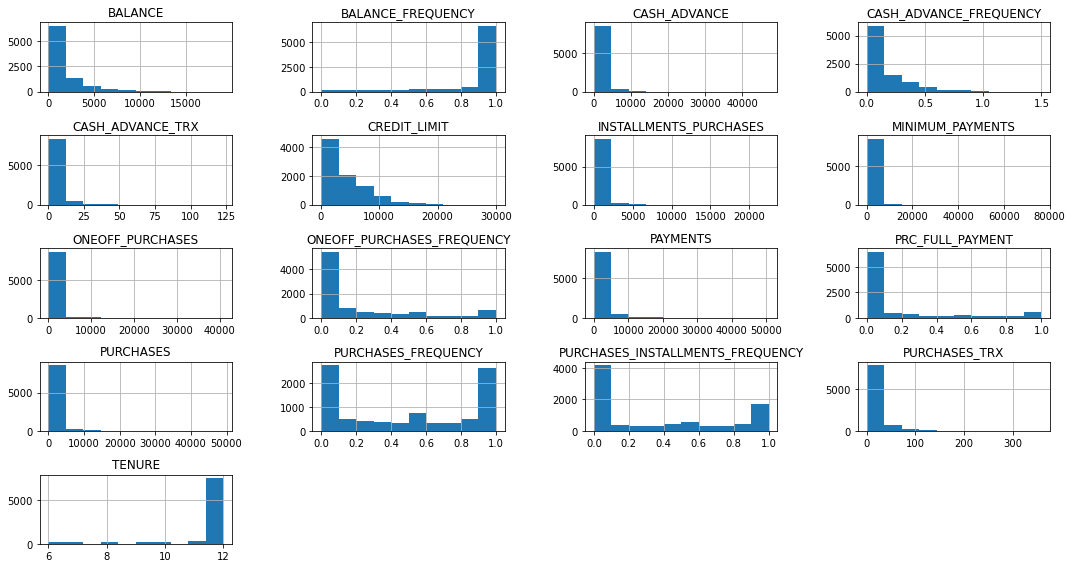

In [26]:
data[int_cols].hist(figsize=(15,8))
plt.tight_layout()

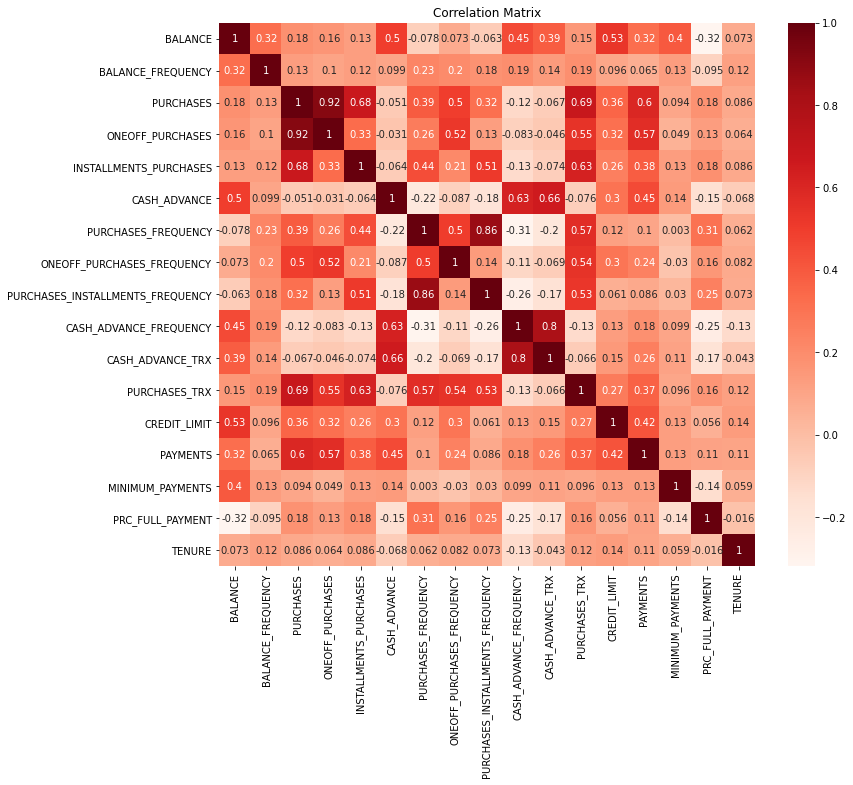

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr_m = data[features].corr()
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds).set_title('Correlation Matrix')
plt.show()

In [28]:
cor_purchases = abs(corr_m["PURCHASES"])
cor_purchases[cor_purchases>0.5].sort_values(ascending=False)

PURCHASES                 1.000000
ONEOFF_PURCHASES          0.916845
PURCHASES_TRX             0.689561
INSTALLMENTS_PURCHASES    0.679896
PAYMENTS                  0.603264
Name: PURCHASES, dtype: float64

In [29]:
print('{0:.2f}%'.format(100*sum(data.PURCHASES == data.ONEOFF_PURCHASES + data.INSTALLMENTS_PURCHASES)/data.shape[0]))

94.50%


In [30]:
data[data.PURCHASES != data.ONEOFF_PURCHASES + data.INSTALLMENTS_PURCHASES].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12
86,C10090,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
110,C10115,156.216753,0.818182,1354.86,585.63,769.23,0.000000,0.916667,0.333333,0.833333,0.000000,0,34,5500.0,858.976682,108.319927,0.000000,12


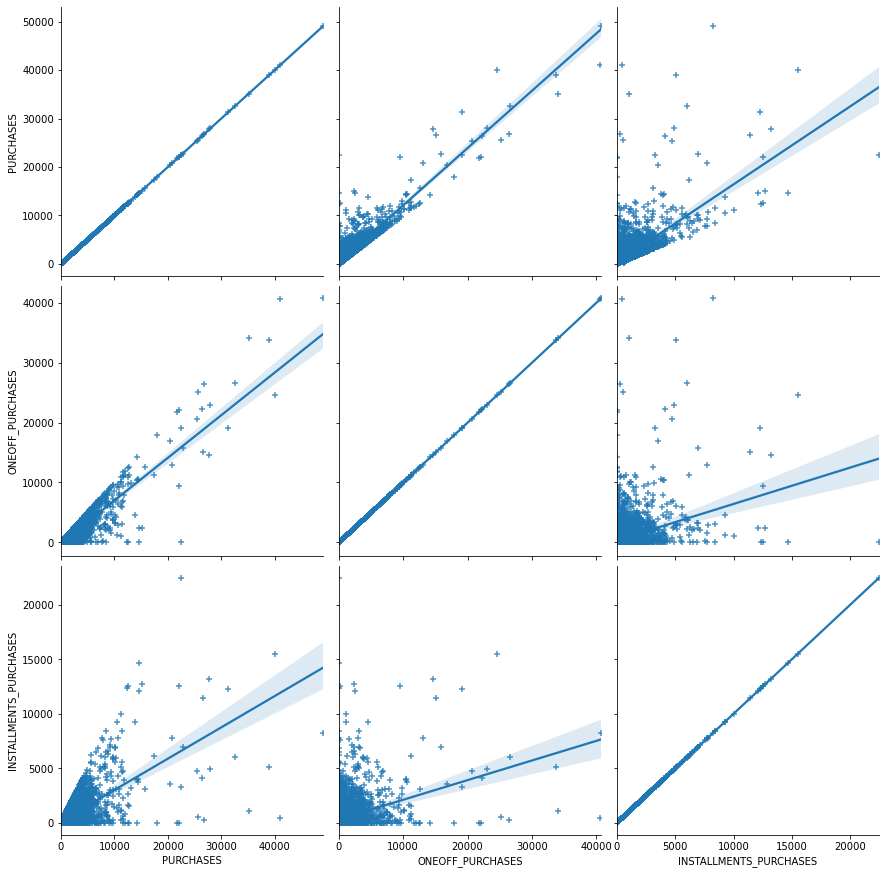

In [31]:
sns.pairplot(data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']],
             markers="+",
             kind='reg',
             diag_kind=None, 
             height=4)

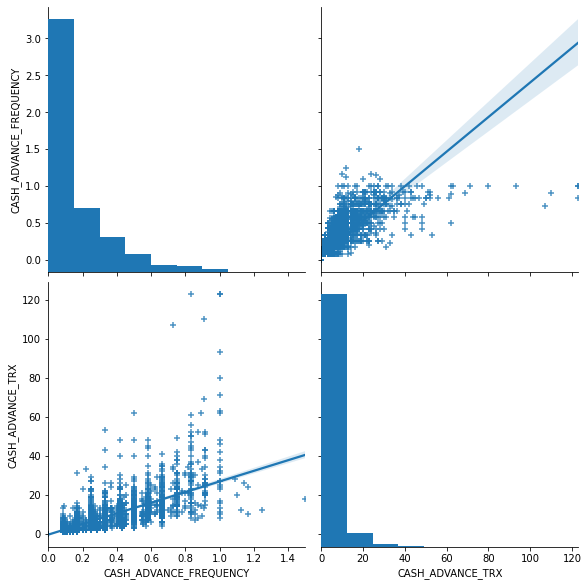

In [32]:
sns.pairplot(data[['CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX']],
             markers="+",
             kind='reg',
             height=4)

In [33]:
features = data.columns[1:]
features_group1 = ['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','CREDIT_LIMIT','MINIMUM_PAYMENTS']
features_group2 = list(set(features)-set(features_group1))

In [34]:
# using median in columns with outliers 
g1_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    #('scaler', MinMaxScaler(feature_range=(0, 1)))
    ('scaler', StandardScaler())
    ])

# using median in columns without outliers 
g2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('group1', g1_transformer, features_group1),
        ('group2', g2_transformer, features_group2),
        ])

In [35]:
preprocessor.fit(data) 
np_data = preprocessor.transform(data) 
print(np_data[np.isnan(np_data)])
df_data = pd.DataFrame(np_data, columns=features_group1+features_group2)
print(df_data.isna().sum())
print(df_data.shape)
df_data.head(6)

[]
BALANCE                             0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
CREDIT_LIMIT                        0
MINIMUM_PAYMENTS                    0
TENURE                              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES                           0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
dtype: int64
(8950, 17)


,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,TENURE,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY
0,-1.205218,-0.987090,0.394480,-0.930733,-0.810069,-0.579510,-0.824484,-1.447163,-0.829841,0.36068,-0.707313,-0.424900,-0.678661,-0.249434,-0.806490,-0.525551,-0.675349
1,0.948918,-0.987090,-1.087454,1.528788,0.784603,-1.379210,1.065033,0.926060,0.908184,0.36068,-0.916995,-0.469552,-0.678661,0.134325,-1.221758,0.234227,0.573963
2,0.824993,1.062022,-1.087454,-0.930733,-0.810069,0.487865,-0.119300,1.010229,0.450407,0.36068,-0.916995,-0.107668,2.673451,0.518084,1.269843,-0.525551,-0.675349
3,0.624653,1.265778,-1.087454,0.564372,-0.123281,-0.874655,-4.161996,1.010229,-0.144271,0.36068,-0.916995,0.232058,-0.399319,-1.016953,-1.014125,-0.525551,-0.258913
4,0.271260,-0.114307,-1.087454,-0.930733,-0.810069,-0.874655,-0.064979,-1.224909,-0.351833,0.36068,-0.916995,-0.462063,-0.399319,0.518084,-1.014125,-0.525551,-0.675349
5,0.665562,-0.987090,1.246835,-0.930733,-0.810069,0.220191,0.389805,-0.730527,1.598968,0.36068,0.550784,0.154492,-0.678661,0.518084,0.439310,-0.525551,-0.675349


In [36]:
#to check StandardScaler
df_data.describe()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,TENURE,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,6.351220e-18,0.000000,1.034058e-16,6.668781e-17,-5.795488e-17,1.397268e-16,3.493171e-16,-5.462049e-16,-2.159415e-16,2.921561e-16,5.716098e-17,3.175610e-18,1.905366e-17,1.587805e-16,9.010793e-17,-1.270244e-17,-1.635439e-16
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.060633e+00,-0.987090,-1.087454e+00,-9.307329e-01,-8.100687e-01,-1.379210e+00,-4.161996e+00,-5.079410e+00,-5.040840e+00,-4.122768e+00,-9.169952e-01,-4.695519e-01,-6.786608e-01,-3.703271e+00,-1.221758e+00,-5.255510e-01,-6.753489e-01
25%,-6.455634e-01,-0.987090,-1.087454e+00,-9.307329e-01,-8.100687e-01,-8.746552e-01,-4.229376e-01,-8.741531e-01,-6.576937e-01,3.606795e-01,-9.169952e-01,-4.510006e-01,-6.786608e-01,4.904486e-02,-1.014125e+00,-5.255510e-01,-6.753489e-01
50%,3.039373e-01,0.141485,3.721960e-01,-9.307329e-01,-8.100687e-01,1.344545e-01,8.164312e-02,-1.075230e-01,-1.442709e-01,3.606795e-01,-4.976286e-01,-3.004541e-01,-3.993193e-01,5.180838e-01,2.404259e-02,-5.255510e-01,-6.753489e-01
75%,7.284269e-01,0.972218,9.081215e-01,1.036809e+00,7.846025e-01,7.247459e-01,5.818980e-01,8.356521e-01,6.458797e-01,3.606795e-01,9.701506e-01,5.004652e-02,3.269728e-01,5.180838e-01,1.062211e+00,-3.712234e-02,4.351492e-01
max,1.834341e+00,2.283062,2.163264e+00,2.086805e+00,3.965987e+00,2.903371e+00,2.644753e+00,2.701570e+00,4.554165e+00,3.606795e-01,1.599199e+00,2.248351e+01,2.673451e+00,5.180838e-01,1.269843e+00,2.893453e+00,6.820521e+00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

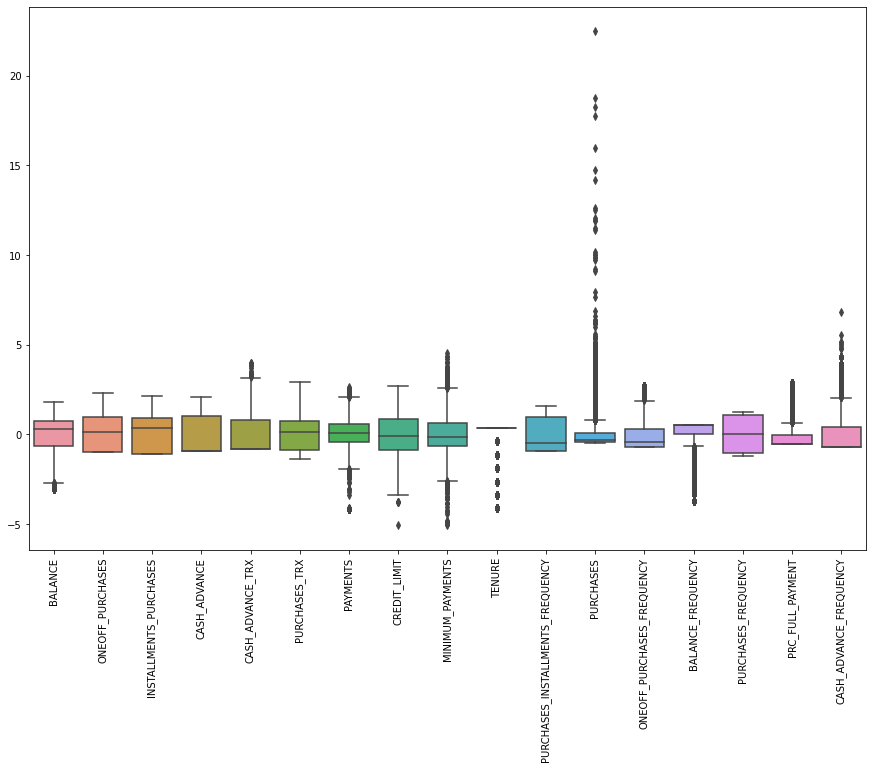

In [37]:
# to check outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df_data)
plt.xticks(rotation=90)

In [38]:
data_range = data.copy()

In [39]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data_range[Range]=0        
    data_range.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data_range.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data_range.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data_range.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data_range.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data_range.loc[((data[c]>10000)),Range]=6

In [40]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:  

    Range=c+'_RANGE'
    data_range[Range]=0
    for i in range(10):
        data_range.loc[((data[c]>i*0.1)&(data[c]<=(i+1)*0.1)), Range]=i+1

In [41]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data_range[Range]=0
    data_range.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data_range.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data_range.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data_range.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data_range.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data_range.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data_range.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data_range.loc[((data[c]>100)),Range]=8

In [42]:
data_range.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

In [43]:
len(data.columns), len(data_range.columns)

(18, 17)

In [44]:
data_range.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,0,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [45]:
data_range.describe()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,11.517318,2.289497,1.591508,1.018659,0.943464,1.241117,3.778101,2.335642,1.597318,8.931173,5.127821,2.198547,3.836313,1.519106,1.633073,2.428156,0.846480
std,1.338331,1.317889,1.348634,1.269914,1.082753,1.577855,1.175955,1.286517,1.027433,2.263846,4.053858,3.101303,4.084579,2.145356,3.017678,2.208116,1.218688
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,10.000000,5.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000
75%,12.000000,3.000000,3.000000,2.000000,1.000000,3.000000,5.000000,3.000000,2.000000,10.000000,10.000000,3.000000,8.000000,2.000000,2.000000,4.000000,1.000000
max,12.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,8.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

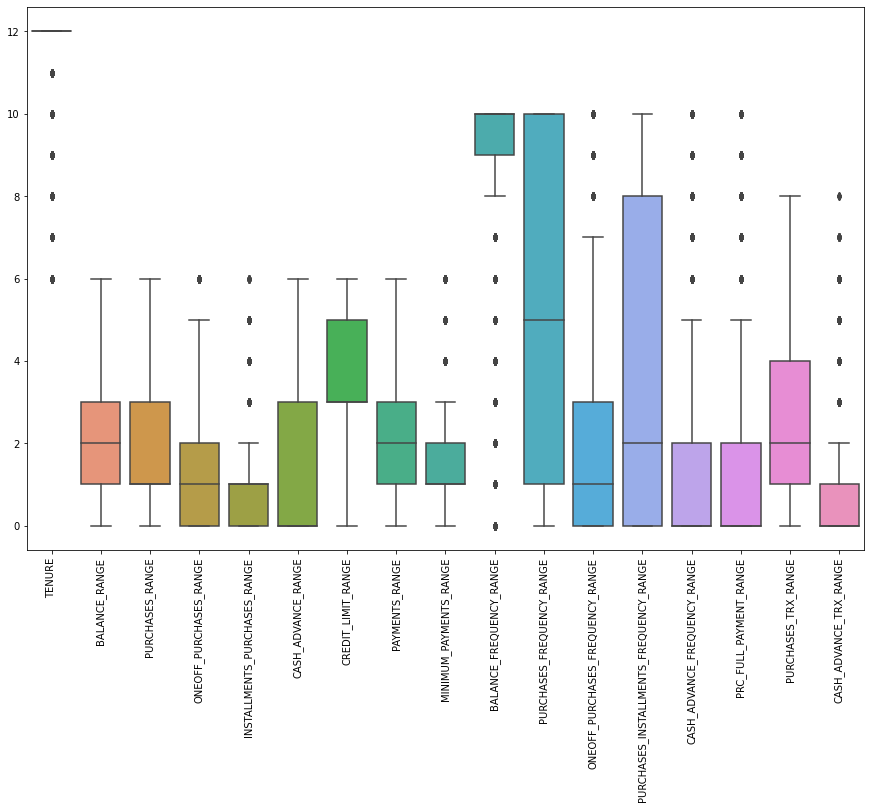

In [46]:
figure(figsize=(15,10))
sns.boxplot(data=data_range)
plt.xticks(rotation=90)

In [47]:
features_group3 = ['INSTALLMENTS_PURCHASES_RANGE','MINIMUM_PAYMENTS_RANGE','ONEOFF_PURCHASES_FREQUENCY_RANGE','CASH_ADVANCE_FREQUENCY_RANGE','PRC_FULL_PAYMENT_RANGE','CASH_ADVANCE_TRX_RANGE']
features_group4 = list(set(data_range.columns)-set(features_group3))

In [48]:
g1_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    #('scaler', MinMaxScaler(feature_range=(0, 1)))
    ('scaler', StandardScaler())
    ])

# using median in columns without outliers 
g2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('group1', g1_transformer, features_group3),
        ('group2', g2_transformer, features_group4),
        ])

In [49]:
data_range.columns

Index(['TENURE', 'BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE',
       'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE',
       'CREDIT_LIMIT_RANGE', 'PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE',
       'BALANCE_FREQUENCY_RANGE', 'PURCHASES_FREQUENCY_RANGE',
       'ONEOFF_PURCHASES_FREQUENCY_RANGE',
       'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
       'CASH_ADVANCE_FREQUENCY_RANGE', 'PRC_FULL_PAYMENT_RANGE',
       'PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE'],
      dtype='object')

In [50]:
preprocessor2.fit(data_range) 
np_data_range = preprocessor2.transform(data_range) 

In [51]:
print(np_data_range[np.isnan(np_data_range)])
df_data2 = pd.DataFrame(np_data_range, columns=features_group3+features_group4)
print(df_data2.isna().sum())
print(df_data2.shape)
df_data2.head(6)


[]
INSTALLMENTS_PURCHASES_RANGE              0
MINIMUM_PAYMENTS_RANGE                    0
ONEOFF_PURCHASES_FREQUENCY_RANGE          0
CASH_ADVANCE_FREQUENCY_RANGE              0
PRC_FULL_PAYMENT_RANGE                    0
CASH_ADVANCE_TRX_RANGE                    0
PURCHASES_FREQUENCY_RANGE                 0
ONEOFF_PURCHASES_RANGE                    0
TENURE                                    0
PAYMENTS_RANGE                            0
CASH_ADVANCE_RANGE                        0
CREDIT_LIMIT_RANGE                        0
PURCHASES_TRX_RANGE                       0
PURCHASES_INSTALLMENTS_FREQUENCY_RANGE    0
PURCHASES_RANGE                           0
BALANCE_FREQUENCY_RANGE                   0
BALANCE_RANGE                             0
dtype: int64
(8950, 17)


,INSTALLMENTS_PURCHASES_RANGE,MINIMUM_PAYMENTS_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,CASH_ADVANCE_TRX_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_RANGE,TENURE,PAYMENTS_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PURCHASES_TRX_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,PURCHASES_RANGE,BALANCE_FREQUENCY_RANGE,BALANCE_RANGE
0,0.324291,-0.547713,-0.891449,-0.858910,-0.642427,-0.855790,-0.771610,-0.802193,0.36068,-1.038243,-0.786629,-1.512132,-0.646812,-0.694434,-0.438623,0.030404,-0.978511
1,-1.015038,1.401039,-0.891449,1.032797,1.028260,0.450657,-1.264994,-0.802193,0.36068,1.293765,2.382407,1.039128,-1.099712,-0.939271,-1.180155,0.472155,1.297983
2,-1.015038,0.592234,1.906266,-0.858910,-0.642427,-0.855790,1.201929,0.772805,0.36068,-0.260907,-0.786629,1.039128,0.258988,-0.939271,0.302910,0.472155,0.539152
3,-1.015038,-2.496465,-0.082728,0.086943,-0.642427,0.450657,-1.018302,1.560304,0.36068,-1.815578,-0.152822,1.039128,-0.646812,-0.939271,1.044443,-0.853097,0.539152
4,-1.015038,-0.547713,-0.082728,-0.858910,-0.642427,-0.855790,-1.018302,-0.014694,0.36068,-0.260907,-0.786629,-0.661712,-0.646812,-0.939271,-0.438623,0.472155,-0.219680
5,1.663619,1.401039,-0.891449,-0.858910,-0.642427,-0.855790,0.461852,-0.802193,0.36068,0.516429,-0.786629,-0.661712,-0.193912,0.529751,1.044443,0.472155,0.539152


In [52]:
df_data.describe()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,TENURE,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES,ONEOFF_PURCHASES_FREQUENCY,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CASH_ADVANCE_FREQUENCY
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,6.351220e-18,0.000000,1.034058e-16,6.668781e-17,-5.795488e-17,1.397268e-16,3.493171e-16,-5.462049e-16,-2.159415e-16,2.921561e-16,5.716098e-17,3.175610e-18,1.905366e-17,1.587805e-16,9.010793e-17,-1.270244e-17,-1.635439e-16
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.060633e+00,-0.987090,-1.087454e+00,-9.307329e-01,-8.100687e-01,-1.379210e+00,-4.161996e+00,-5.079410e+00,-5.040840e+00,-4.122768e+00,-9.169952e-01,-4.695519e-01,-6.786608e-01,-3.703271e+00,-1.221758e+00,-5.255510e-01,-6.753489e-01
25%,-6.455634e-01,-0.987090,-1.087454e+00,-9.307329e-01,-8.100687e-01,-8.746552e-01,-4.229376e-01,-8.741531e-01,-6.576937e-01,3.606795e-01,-9.169952e-01,-4.510006e-01,-6.786608e-01,4.904486e-02,-1.014125e+00,-5.255510e-01,-6.753489e-01
50%,3.039373e-01,0.141485,3.721960e-01,-9.307329e-01,-8.100687e-01,1.344545e-01,8.164312e-02,-1.075230e-01,-1.442709e-01,3.606795e-01,-4.976286e-01,-3.004541e-01,-3.993193e-01,5.180838e-01,2.404259e-02,-5.255510e-01,-6.753489e-01
75%,7.284269e-01,0.972218,9.081215e-01,1.036809e+00,7.846025e-01,7.247459e-01,5.818980e-01,8.356521e-01,6.458797e-01,3.606795e-01,9.701506e-01,5.004652e-02,3.269728e-01,5.180838e-01,1.062211e+00,-3.712234e-02,4.351492e-01
max,1.834341e+00,2.283062,2.163264e+00,2.086805e+00,3.965987e+00,2.903371e+00,2.644753e+00,2.701570e+00,4.554165e+00,3.606795e-01,1.599199e+00,2.248351e+01,2.673451e+00,5.180838e-01,1.269843e+00,2.893453e+00,6.820521e+00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

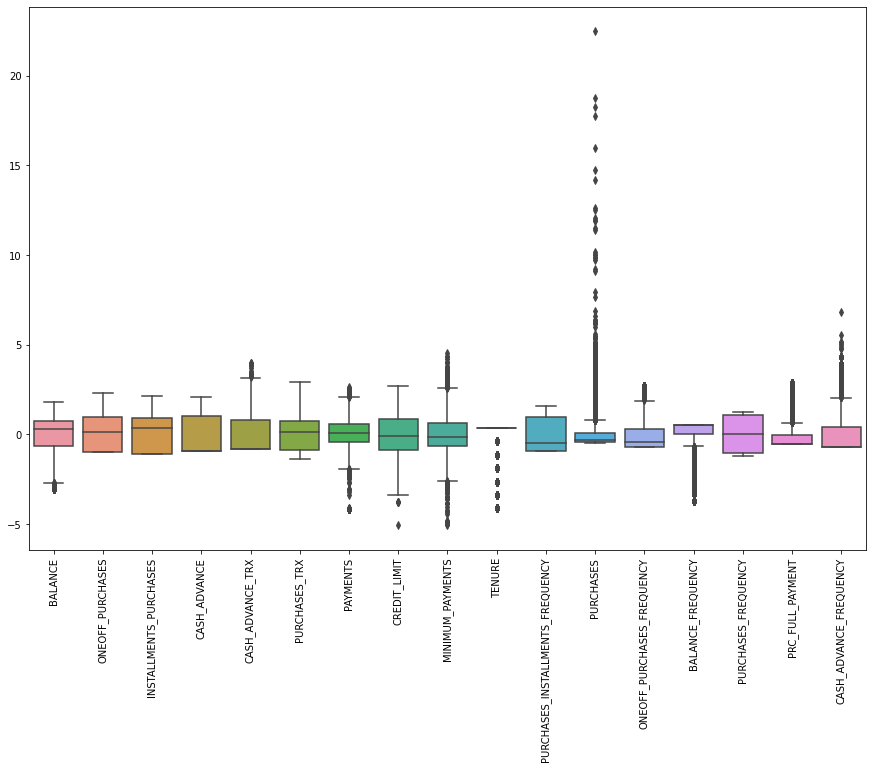

In [53]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_data)
plt.xticks(rotation=90)

In [54]:
pca = PCA(n_components=2)
pca.fit(np_data)

PCA(n_components=2)

Text(0, 0.5, 'Second Principal Component')

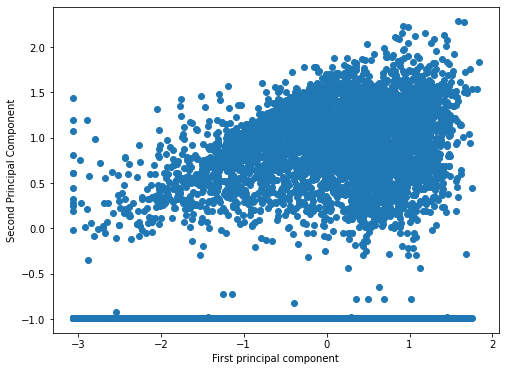

In [55]:
data_pca = pca.transform(np_data)
plt.figure(figsize=(8,6))
plt.scatter(np_data[:,0],np_data[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [56]:
print(pca.noise_variance_)
print(pca.explained_variance_ratio_)

0.5267483194439234
[0.30980196 0.22547204]


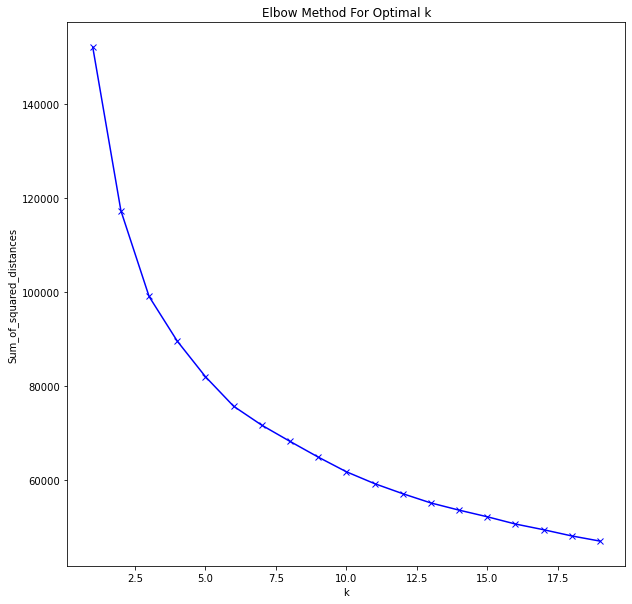

In [57]:
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k, 
                init='k-means++',
                max_iter=400, 
                n_init=80, 
                random_state=0).fit(np_data)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2280318342114139
For n_clusters = 3 The average silhouette_score is : 0.21851083833782883
For n_clusters = 4 The average silhouette_score is : 0.21357701226001433
For n_clusters = 5 The average silhouette_score is : 0.21524329716776858
For n_clusters = 6 The average silhouette_score is : 0.21018149115309923
For n_clusters = 7 The average silhouette_score is : 0.21331863625334344
For n_clusters = 8 The average silhouette_score is : 0.20453340238118206
For n_clusters = 9 The average silhouette_score is : 0.17357552429291564
For n_clusters = 10 The average silhouette_score is : 0.1761440399368585
For n_clusters = 11 The average silhouette_score is : 0.17710745833710806
For n_clusters = 12 The average silhouette_score is : 0.1824683760291043
For n_clusters = 13 The average silhouette_score is : 0.17974001631469336
For n_clusters = 14 The average silhouette_score is : 0.17801349283299517
For n_clusters = 15 The average silhouette_score 

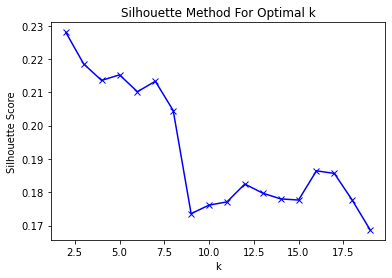

In [58]:
silhouette_scores = [] 
K = range(2, 20)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45).fit_predict(np_data)
    scr = silhouette_score(np_data, km)
    silhouette_scores.append(scr)
    print("For n_clusters =", k, "The average silhouette_score is :", scr)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

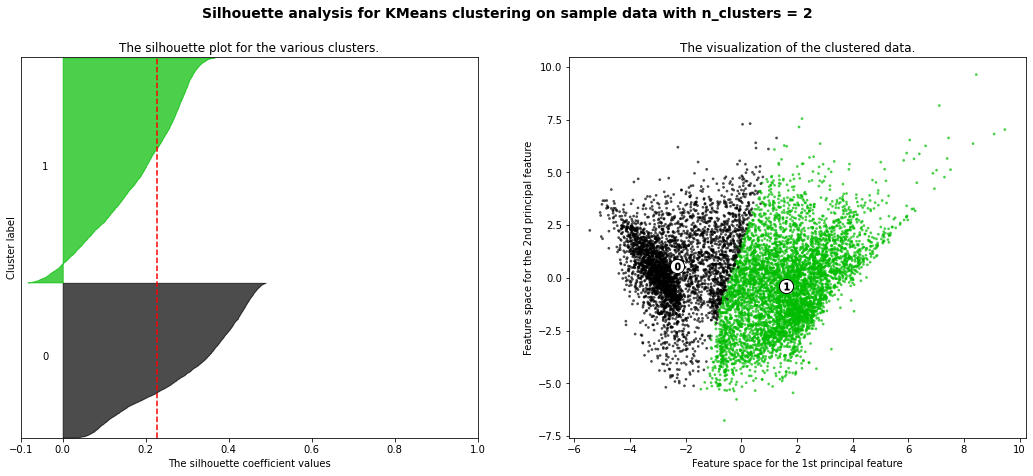

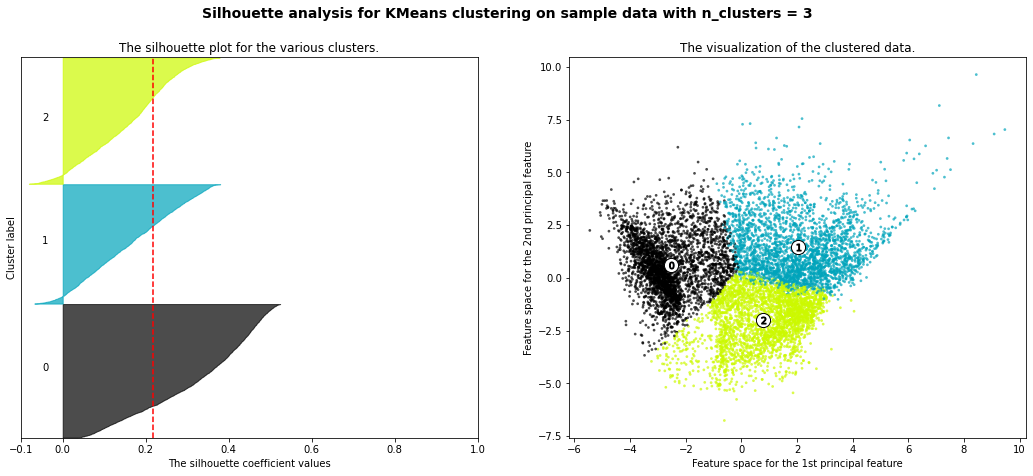

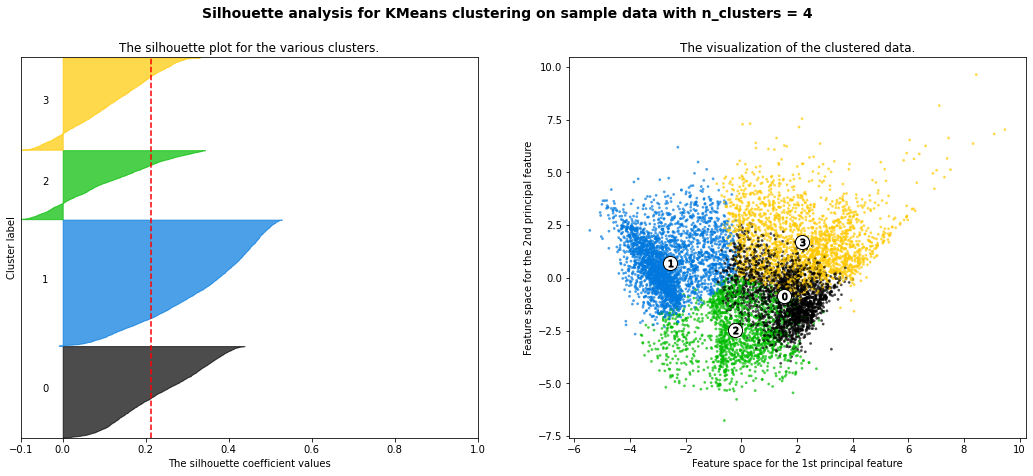

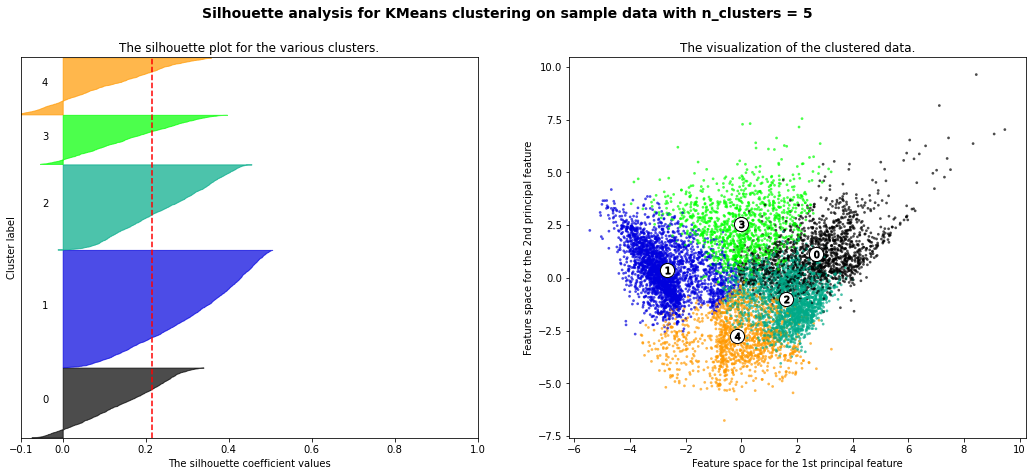

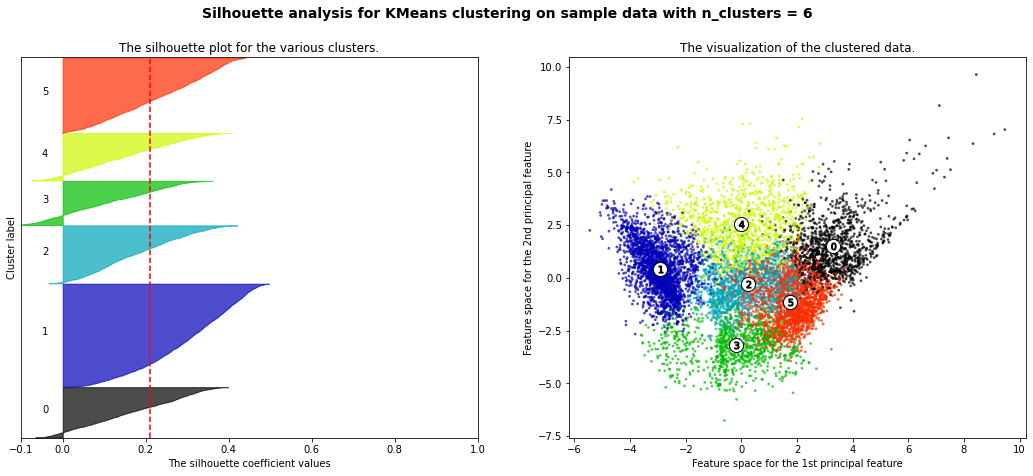

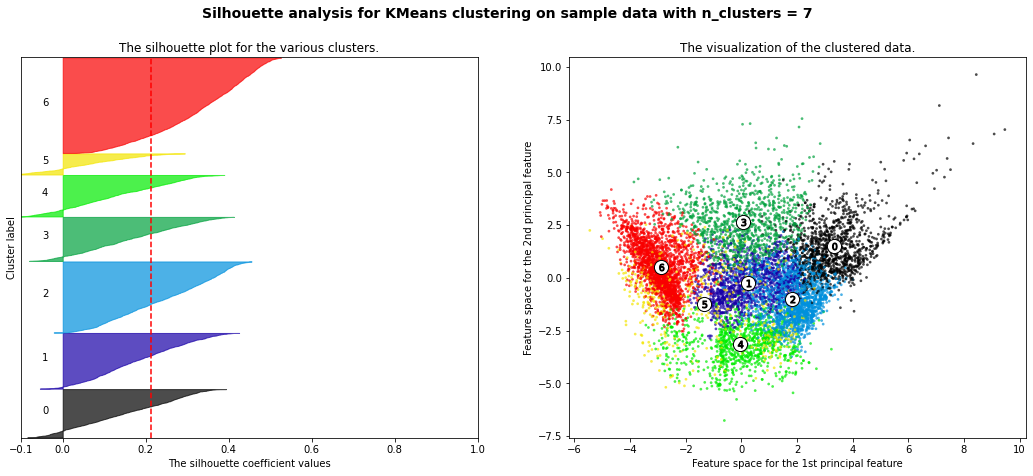

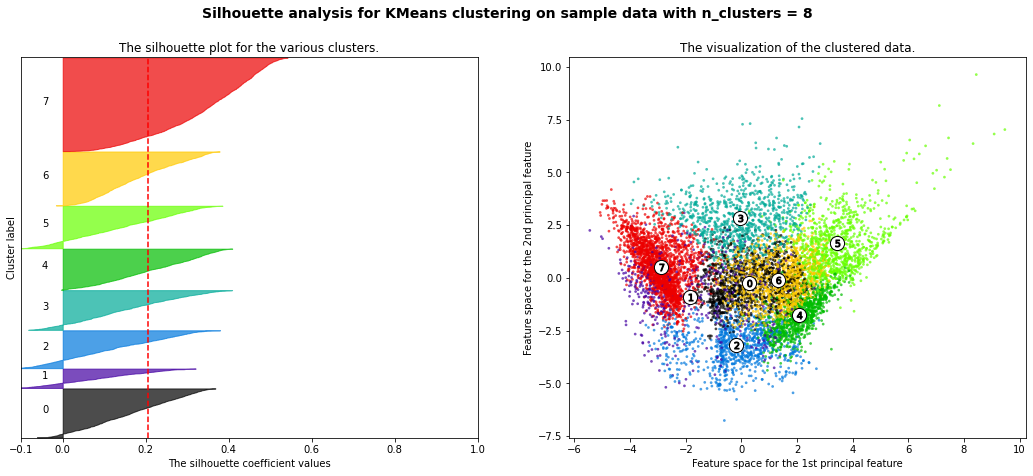

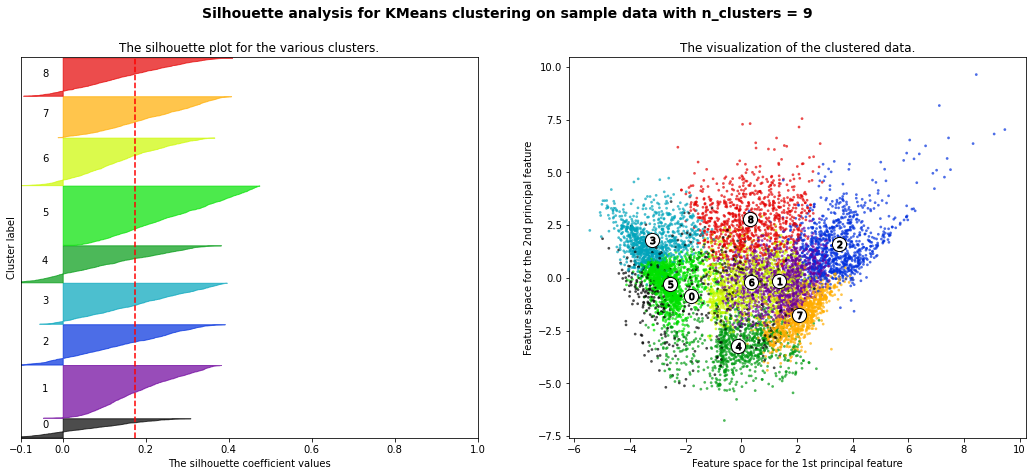

In [59]:
K = range(2,10)

for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np_data) + (k + 1) * 10])

    clusterer = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45)
    cluster_labels = clusterer.fit_predict(np_data)

    silhouette_avg = silhouette_score(np_data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np_data, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    pca = PCA(n_components=2)
    pca.fit(np_data)
    X = pca.transform(np_data)

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    pca_centers = pca.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(pca_centers[:, 0], pca_centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(pca_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal feature")
    ax2.set_ylabel("Feature space for the 2nd principal feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

In [60]:
km = KMeans(n_clusters=6, 
            init='k-means++',
            max_iter=400, 
            n_init=80, 
            random_state=0)

km_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('km', km)])

km_pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('group1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BALANCE',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                             

In [61]:
labels = km.labels_

In [62]:
clusters = pd.concat([data, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,5
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


In [63]:
clusters.CLUSTER.value_counts()

1    2445
4    1773
5    1370
2    1193
0    1124
3    1045
Name: CLUSTER, dtype: int64

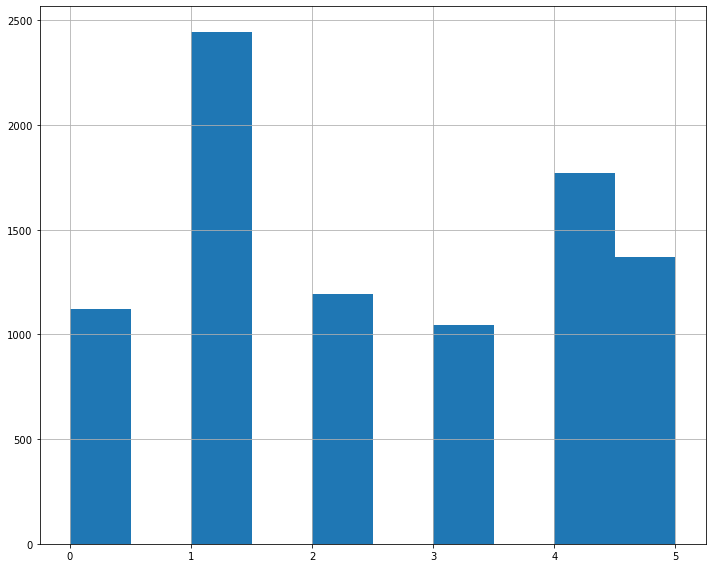

In [64]:
clusters.CLUSTER.hist(figsize=(10, 8))
plt.tight_layout()

In [65]:
# save clusters to csv
clusters.to_csv('Clusters_CreditCards_Kmeans.csv')

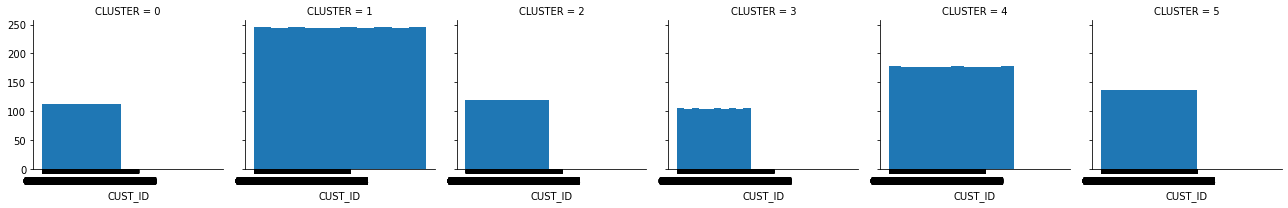

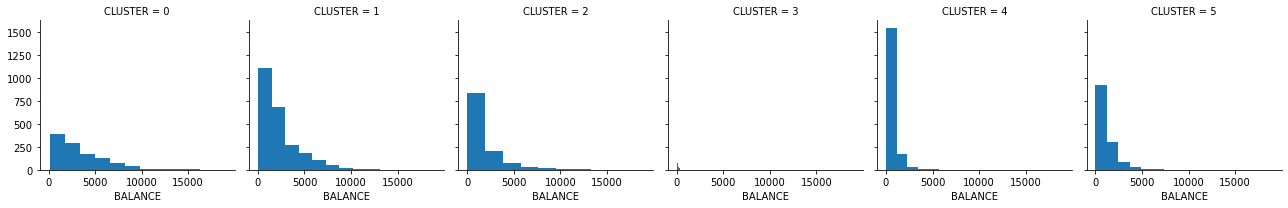

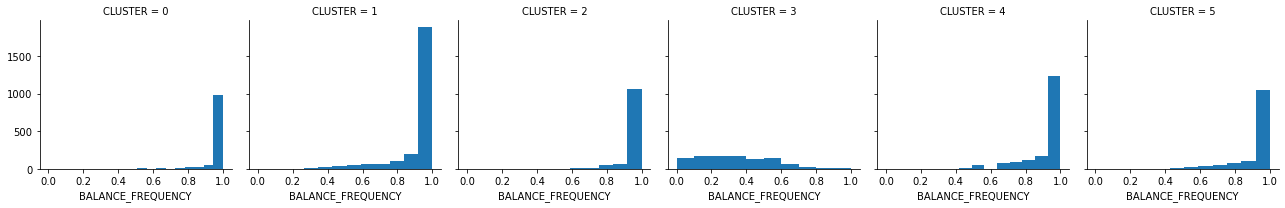

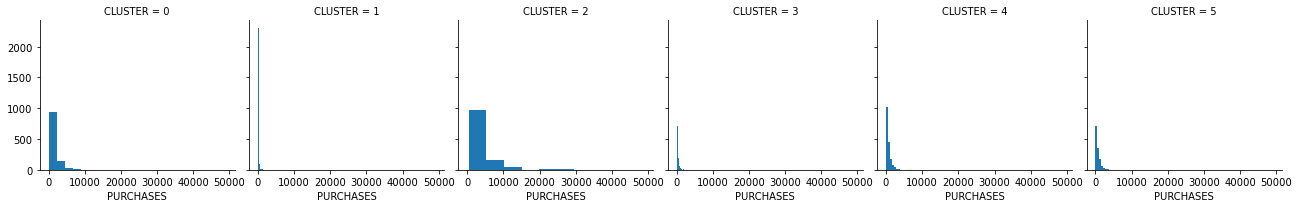

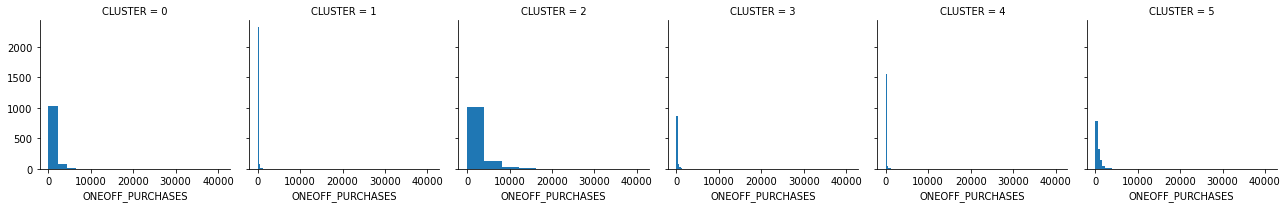

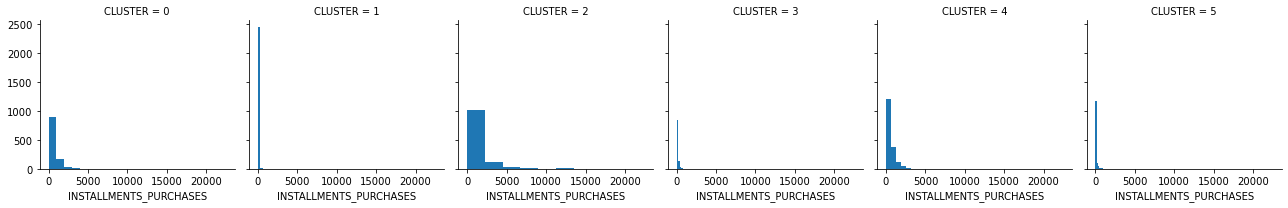

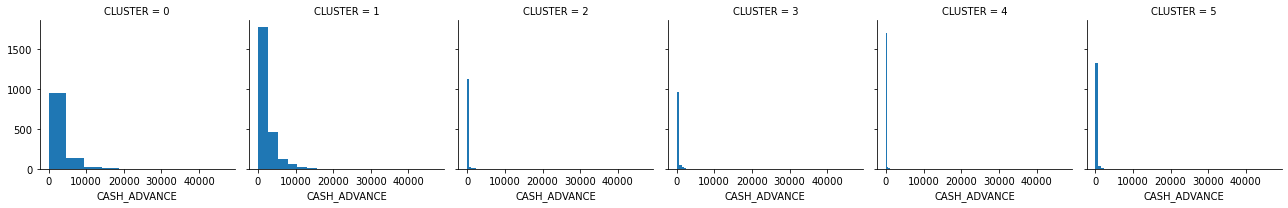

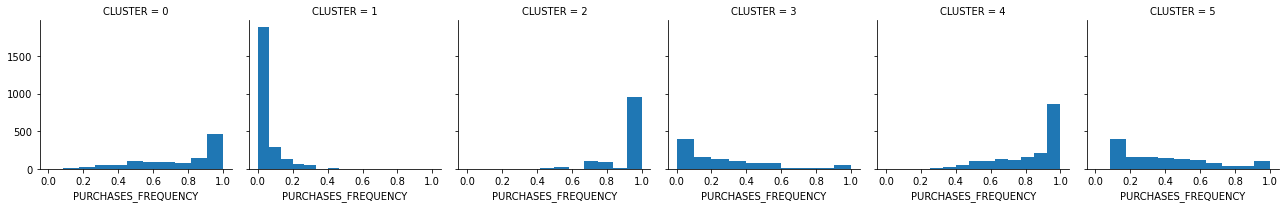

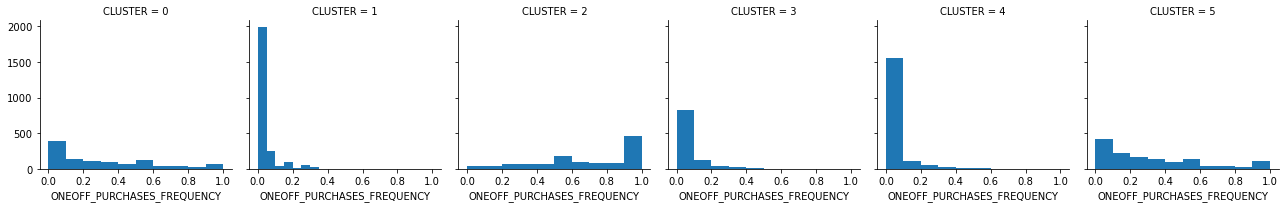

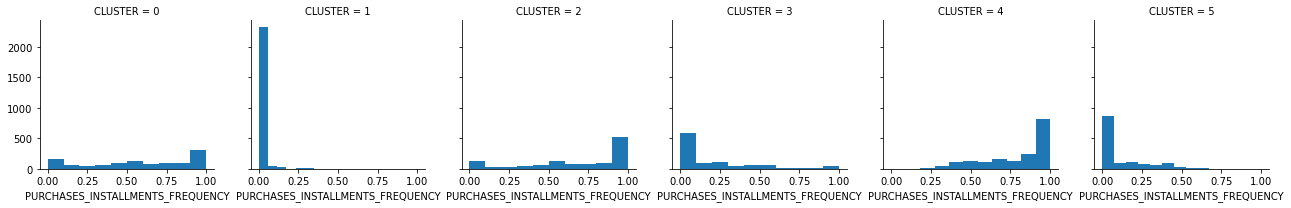

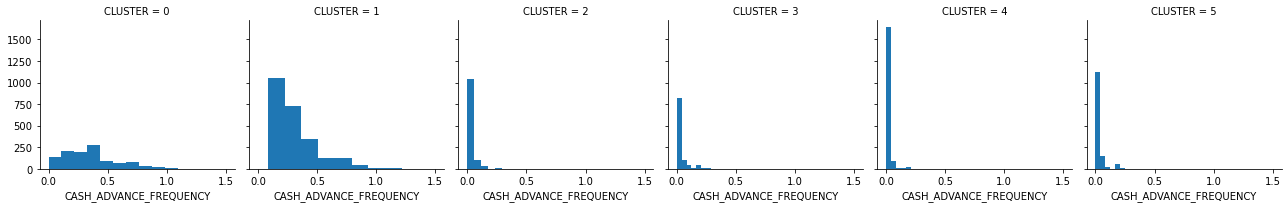

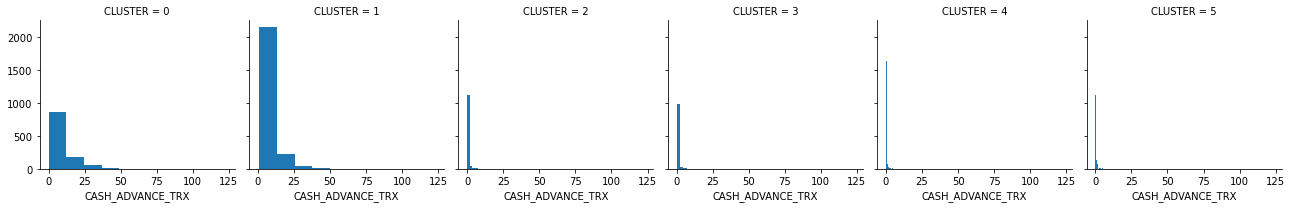

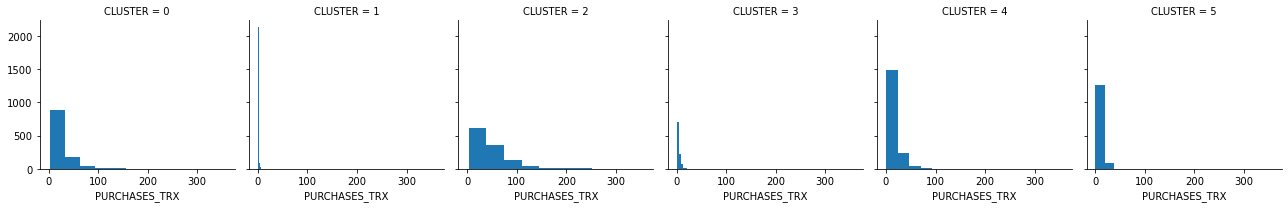

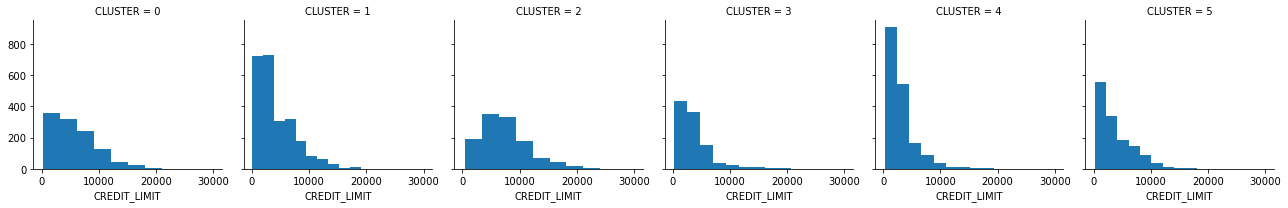

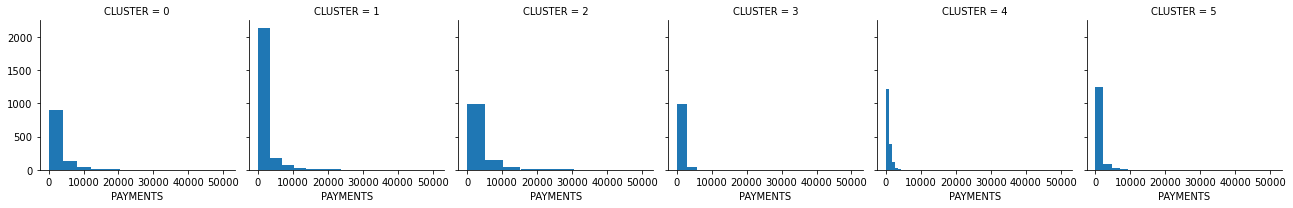

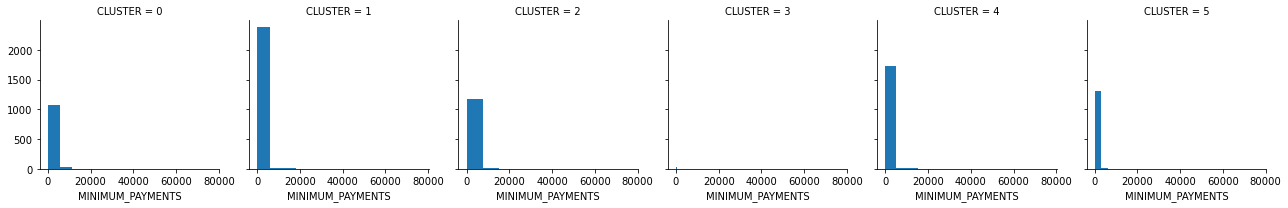

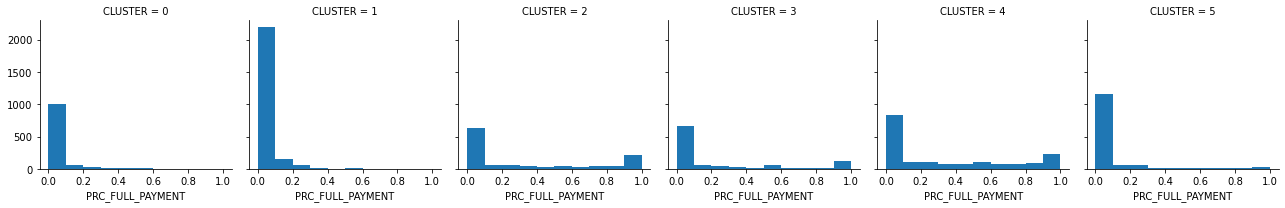

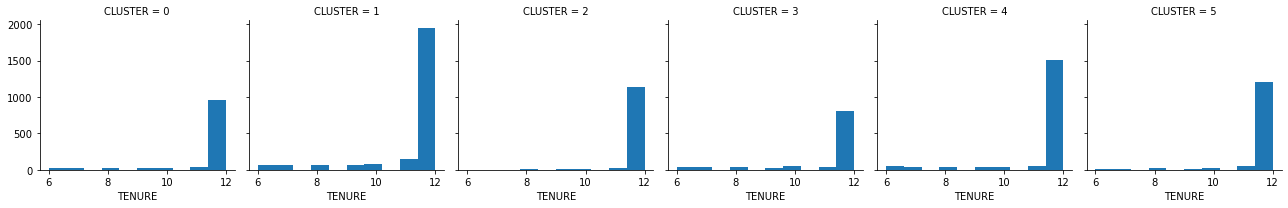

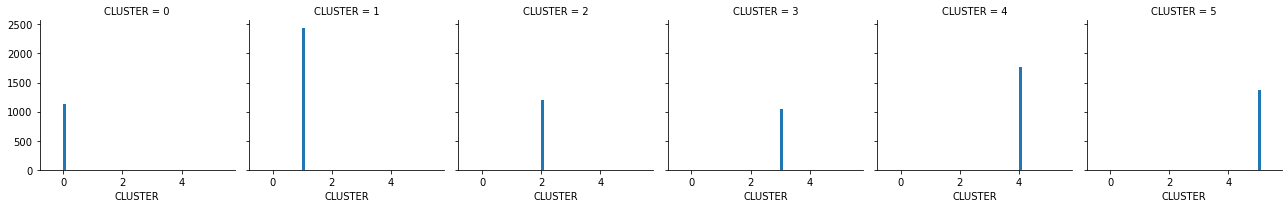

In [66]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='CLUSTER')
    grid.map(plt.hist, c)


In [67]:
clusters.groupby(['CLUSTER']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,3389.259942,0.978559,1416.463372,774.485810,642.263158,2770.179638,0.759022,0.310086,0.581979,0.354532,9.557829,24.270463,5896.574733,2994.902039,1637.853729,0.038490,11.502669
1,2358.614436,0.936088,57.957415,51.244916,6.762262,2129.537864,0.037312,0.026326,0.009461,0.294391,6.902249,0.553783,4220.335874,1713.713702,1065.443542,0.030105,11.390184
2,1738.051668,0.978078,3992.181953,2647.849757,1344.332196,83.928880,0.938245,0.690139,0.699807,0.015615,0.246438,50.179380,7409.247123,3645.880965,828.299737,0.320997,11.897737
3,39.911127,0.345305,255.923321,144.855799,111.351541,163.658549,0.262438,0.065135,0.186368,0.026300,0.477512,3.825837,3528.627075,732.615319,100.234989,0.207679,11.234450
4,437.111859,0.927194,689.322042,61.243469,628.908957,33.845959,0.845903,0.040165,0.800150,0.008843,0.134800,15.823463,3020.609792,806.360996,635.741127,0.321950,11.487874
5,1120.808134,0.942577,724.519438,647.923255,76.942810,79.806747,0.402123,0.318598,0.099378,0.021512,0.310949,8.103650,3938.465163,1029.591633,657.590113,0.064297,11.678832


In [68]:
dist = 1 - cosine_similarity(np_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

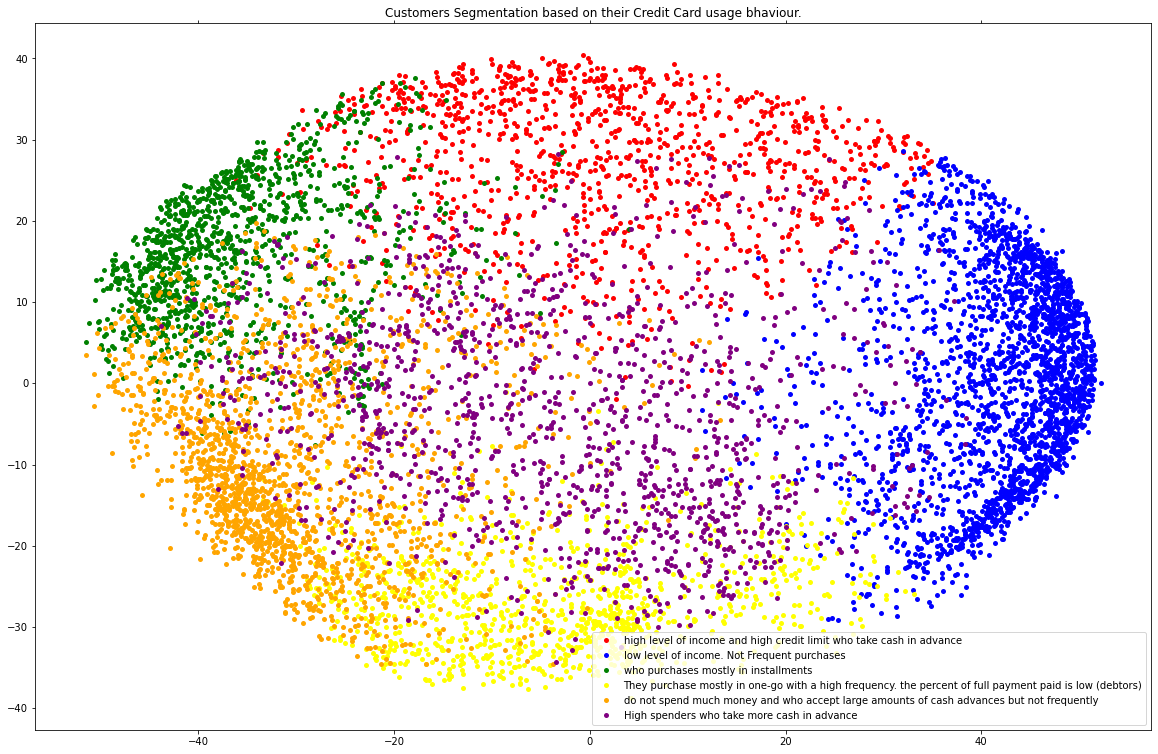

In [69]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'high level of income and high credit limit who take cash in advance', 
         1: 'low level of income. Not Frequent purchases', 
         2: 'who purchases mostly in installments', 
         3: 'They purchase mostly in one-go with a high frequency. the percent of full payment paid is low (debtors)', 
         4: 'do not spend much money and who accept large amounts of cash advances but not frequently',
         5: 'High spenders who take more cash in advance'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [70]:
preprocessor.fit(data) 
np_data = preprocessor.transform(data) 

In [71]:
siliuette_list_hierarchical = []
for cluster in range(2,10):
    for linkage_method in ['ward', 'average','single']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(np_data)
        sil_score = metrics.silhouette_score(np_data, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method))
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method'])
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method
1,2,0.632119,average
4,3,0.554539,average
2,2,0.551226,single
14,6,0.462904,single
5,3,0.462749,single
11,5,0.462710,single
8,4,0.462556,single
20,8,0.462285,single
17,7,0.462191,single
7,4,0.319987,average


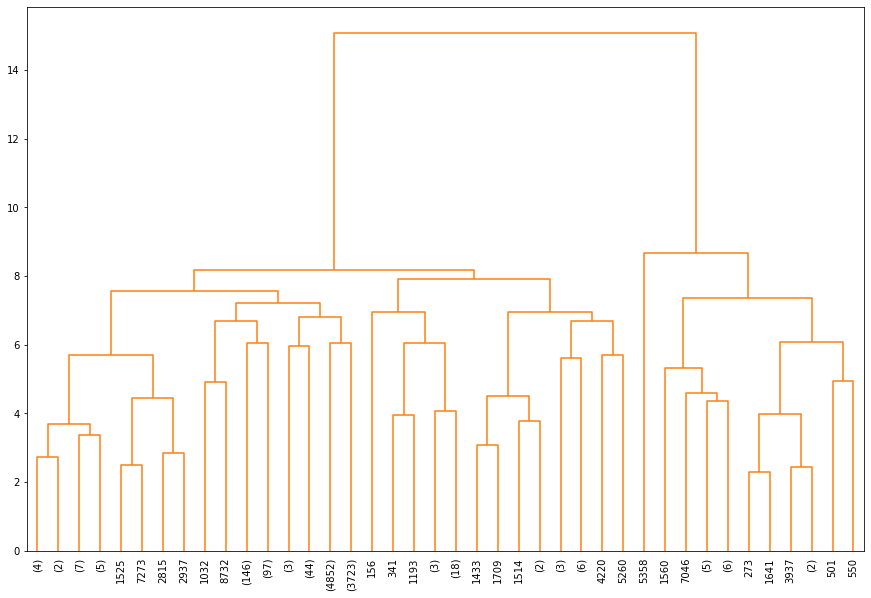

In [72]:
Z_avg = linkage(np_data, 'average')

plt.figure(figsize=(15,10))
dendrogram(Z_avg, leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

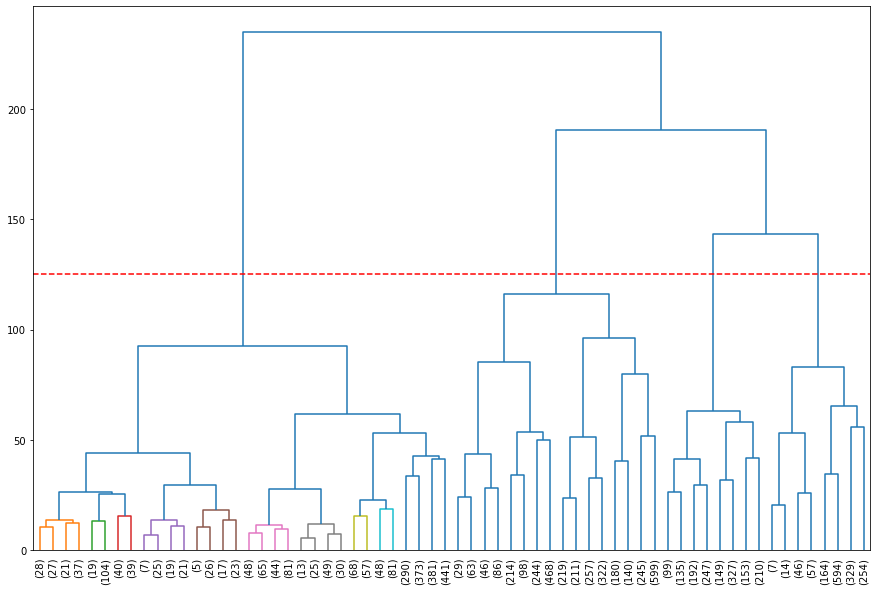

In [73]:
Z_ward = linkage(np_data, 'ward')

plt.figure(figsize=(15,10))
dendrogram(Z_ward, leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()


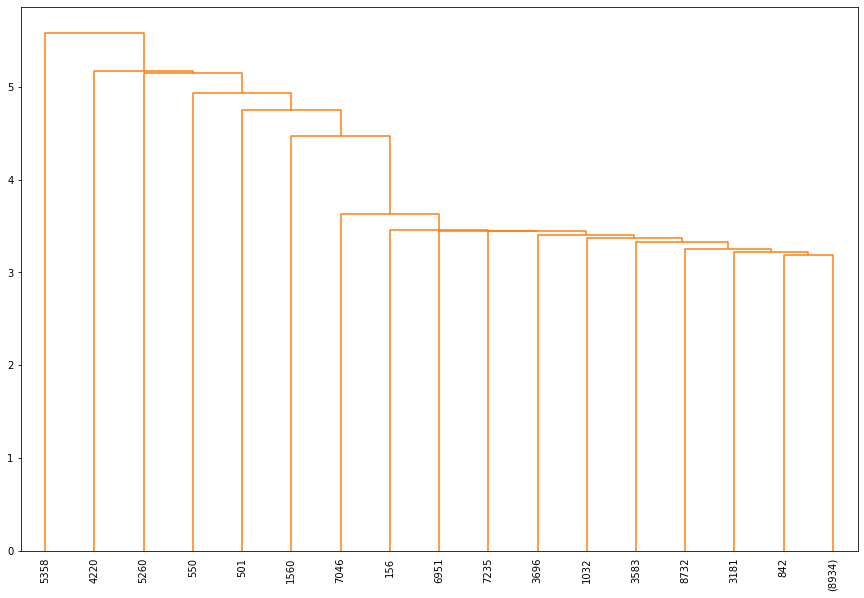

In [74]:
Z_ward = linkage(np_data, 'single')

plt.figure(figsize=(15,10))
dendrogram(Z_ward, leaf_rotation=90, p=15, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

In [75]:
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='average')

In [76]:
pipe_hierar = Pipeline(steps=[
                              ('preprocessor', preprocessor),
                              ('hierarchical', hierarchical)]
                       )

pipe_hierar.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('group1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BALANCE',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                             

In [77]:
clusters_hierar = pd.concat([data, pd.DataFrame({'CLUSTER':hierarchical.labels_})], axis=1)
clusters_hierar.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [78]:
clusters_hierar.to_csv('Clusters_CreditCard_Hierarchical.csv')

In [79]:
clusters_hierar.groupby('CLUSTER').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,5807.970136,0.986580,28891.741429,23092.431429,5799.310000,1062.501944,0.935714,0.875397,0.728571,0.043651,1.952381,131.952381,15785.714286,27060.864949,3584.973735,0.548521,11.904762
1,1554.494606,0.877014,937.614144,539.519925,398.395107,978.674422,0.489303,0.200875,0.363581,0.135359,3.251876,14.434091,4467.890696,1673.575911,857.575146,0.152786,11.516407


In [80]:
clusters_hierar.CLUSTER.value_counts()

1    8929
0      21
Name: CLUSTER, dtype: int64

# Successfully six cluster was formed and it was analysed with PCA and hierarchical model.